In [30]:
import pandas as pd

df = pd.read_csv('rnaseq_s1.tsv', sep='\t')
df = pd.merge(df, pd.read_csv('file_to_case.tsv', sep='\t'), on='file_id', how='left')
df = pd.merge(df, pd.read_csv('clinical.tsv', sep='\t'), on='case_id', how='left')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

arr =  ['vital_status',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'icd_10_code',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'site_of_resection_or_biopsy',
 'synchronous_malignancy',
 'tissue_or_organ_of_origin',
 'treatment_or_therapy',
 'treatment_type',
 'treatment_or_therapy_2',
 'treatment_type_2',
 'alcohol_history']

for i in arr:
    X = df.drop(columns=['file_id'] + list(pd.read_csv('clinical.tsv', sep='\t').columns)).apply(pd.to_numeric)
    y = df[i].map({value: index for index, value in enumerate(df[i].unique())})

    X = MinMaxScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i, "Accuracy:", accuracy)

vital_status Accuracy: 0.5486725663716814
ajcc_clinical_m Accuracy: 0.9646017699115044
ajcc_clinical_n Accuracy: 0.4778761061946903
ajcc_clinical_stage Accuracy: 0.49557522123893805
ajcc_clinical_t Accuracy: 0.30973451327433627
ajcc_pathologic_m Accuracy: 0.6283185840707964
ajcc_pathologic_n Accuracy: 0.37168141592920356
ajcc_pathologic_stage Accuracy: 0.5132743362831859
ajcc_pathologic_t Accuracy: 0.2920353982300885
ajcc_staging_system_edition Accuracy: 0.7256637168141593
icd_10_code Accuracy: 0.3185840707964602
morphology Accuracy: 0.831858407079646
primary_diagnosis Accuracy: 0.8849557522123894
prior_malignancy Accuracy: 0.9203539823008849
prior_treatment Accuracy: 0.9734513274336283
site_of_resection_or_biopsy Accuracy: 0.3805309734513274
synchronous_malignancy Accuracy: 0.9557522123893806
tissue_or_organ_of_origin Accuracy: 0.34513274336283184
treatment_or_therapy Accuracy: 0.46017699115044247
treatment_type Accuracy: 0.40707964601769914
treatment_or_therapy_2 Accuracy: 0.39823008

Epoch 1/120
2/2 [==============================] - 0s 65ms/step - loss: 0.1254 - val_loss: 0.1246
Epoch 2/120
2/2 [==============================] - 0s 10ms/step - loss: 0.1248 - val_loss: 0.1240
Epoch 3/120
2/2 [==============================] - 0s 9ms/step - loss: 0.1242 - val_loss: 0.1233
Epoch 4/120
2/2 [==============================] - 0s 9ms/step - loss: 0.1235 - val_loss: 0.1226
Epoch 5/120
2/2 [==============================] - 0s 9ms/step - loss: 0.1228 - val_loss: 0.1219
Epoch 6/120
2/2 [==============================] - 0s 10ms/step - loss: 0.1221 - val_loss: 0.1211
Epoch 7/120
2/2 [==============================] - 0s 9ms/step - loss: 0.1212 - val_loss: 0.1202
Epoch 8/120
2/2 [==============================] - 0s 9ms/step - loss: 0.1203 - val_loss: 0.1193
Epoch 9/120
2/2 [==============================] - 0s 10ms/step - loss: 0.1194 - val_loss: 0.1183
Epoch 10/120
2/2 [==============================] - 0s 10ms/step - loss: 0.1183 - val_loss: 0.1172
Epoch 11/120
2/2 [======

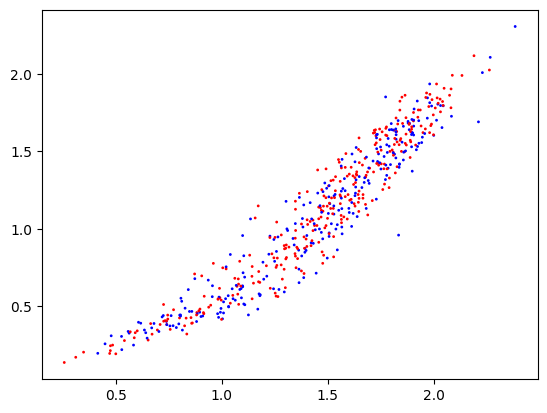

In [32]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

i = 'vital_status'
X = df.drop(columns=['file_id'] + list(pd.read_csv('clinical.tsv', sep='\t').columns)).apply(pd.to_numeric)
y = df['vital_status'].map({'Alive': True, 'Dead': False})
X = MinMaxScaler().fit_transform(X)

input_img = Input(shape=(23,))
encoded = Dense(20, activation='relu')(input_img)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(23, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(X, X,
                epochs=120,
                batch_size=256,
                shuffle=True,
                validation_split=0.2
)

encoded_imgs = encoder.predict(X)

plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y, cmap='bwr', s=1)
plt.show()

18/18 [==============================] - 0s 299us/step


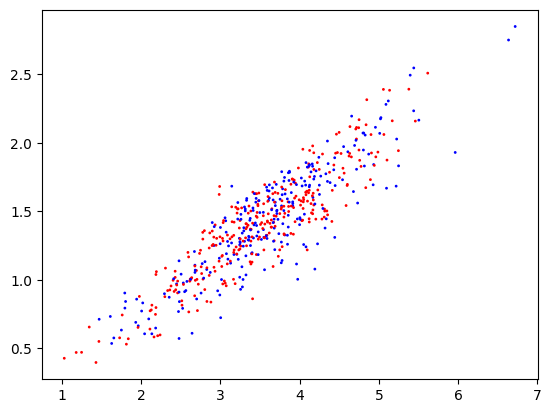

In [27]:
import pandas as pd

df = pd.read_csv('rnaseq_s1_s2.tsv', sep='\t')
df = pd.merge(df, pd.read_csv('file_to_case.tsv', sep='\t'), on='file_id', how='left')
df = pd.merge(df, pd.read_csv('clinical.tsv', sep='\t'), on='case_id', how='left')

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

i = 'vital_status'
X = df.drop(columns=['file_id'] + list(pd.read_csv('clinical.tsv', sep='\t').columns)).apply(pd.to_numeric)
y = df['vital_status'].map({'Alive': True, 'Dead': False})
X = MinMaxScaler().fit_transform(X)

input_img = Input(shape=(50,))
encoded = Dense(30, activation='relu')(input_img)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(30, activation='relu')(decoded)
decoded = Dense(50, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(X, X,
                epochs=120,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,
                verbose=0
)

encoded_imgs = encoder.predict(X)

plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y, cmap='bwr', s=1)
plt.show()

case_id                         ID
case_submitter_id               ID
age_at_index                    NUM
days_to_birth                   NUM (age)
days_to_death                   NUM (null if alive)
ethnicity
gender
race
vital_status                    CAT
year_of_birth
year_of_death
age_at_diagnosis
ajcc_clinical_m                 M0: 495, MX: 21, M1: 6, '--, 5 (imbalance)
ajcc_clinical_n                 N0: 245, N1: 85, N2b: 85, N2c: 45, N2: 19, NX: 18, N2a: 17, N3: 9, '-- 4 (imbalance)
ajcc_clinical_stage
ajcc_clinical_t
ajcc_pathologic_m
ajcc_pathologic_n
ajcc_pathologic_stage
ajcc_pathologic_t
ajcc_staging_system_edition
days_to_last_follow_up
icd_10_code
morphology
primary_diagnosis
prior_malignancy
prior_treatment
site_of_resection_or_biopsy
synchronous_malignancy
tissue_or_organ_of_origin
year_of_diagnosis
treatment_or_therapy
treatment_type
treatment_or_therapy_2
treatment_type_2
alcohol_history
cigarettes_per_day
pack_years_smoked
years_smoked

vital_status Accuracy: 0.5486725663716814
ajcc_clinical_m Accuracy: 0.9646017699115044
ajcc_clinical_n Accuracy: 0.4778761061946903
ajcc_clinical_stage Accuracy: 0.49557522123893805
ajcc_clinical_t Accuracy: 0.30973451327433627
ajcc_pathologic_m Accuracy: 0.6283185840707964
ajcc_pathologic_n Accuracy: 0.37168141592920356
ajcc_pathologic_stage Accuracy: 0.5132743362831859
ajcc_pathologic_t Accuracy: 0.2920353982300885
ajcc_staging_system_edition Accuracy: 0.7256637168141593
icd_10_code Accuracy: 0.3185840707964602
morphology Accuracy: 0.831858407079646
primary_diagnosis Accuracy: 0.8849557522123894
prior_malignancy Accuracy: 0.9203539823008849
prior_treatment Accuracy: 0.9734513274336283
site_of_resection_or_biopsy Accuracy: 0.3805309734513274
synchronous_malignancy Accuracy: 0.9557522123893806
tissue_or_organ_of_origin Accuracy: 0.34513274336283184
treatment_or_therapy Accuracy: 0.46017699115044247
treatment_type Accuracy: 0.40707964601769914
treatment_or_therapy_2 Accuracy: 0.39823008849557523
treatment_type_2 Accuracy: 0.4247787610619469
alcohol_history Accuracy: 0.7345132743362832

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('clinical.tsv', sep='\t')


#plt.hist(df['days_to_death'].apply(pd.to_numeric), bins=20)
#plt.hist(df['days_to_death'].replace("'--", np.NaN).apply(pd.to_numeric), bins=20)
#print(df['ethnicity'].value_counts())
#print(df['morphology'].value_counts())
for col in df.columns:
    print(col)


case_id
case_submitter_id
age_at_index
days_to_birth
days_to_death
ethnicity
gender
race
vital_status
year_of_birth
year_of_death
age_at_diagnosis
ajcc_clinical_m
ajcc_clinical_n
ajcc_clinical_stage
ajcc_clinical_t
ajcc_pathologic_m
ajcc_pathologic_n
ajcc_pathologic_stage
ajcc_pathologic_t
ajcc_staging_system_edition
days_to_last_follow_up
icd_10_code
morphology
primary_diagnosis
prior_malignancy
prior_treatment
site_of_resection_or_biopsy
synchronous_malignancy
tissue_or_organ_of_origin
year_of_diagnosis
treatment_or_therapy
treatment_type
treatment_or_therapy_2
treatment_type_2
alcohol_history
cigarettes_per_day
pack_years_smoked
years_smoked
